In [11]:
import numpy as np
import pandas as pd
from glmnet import GLMNetPath
from sklearn.base import clone
import matplotlib.pyplot as plt
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [12]:
%%R -o X,Y,N
#install.packages('lars', repo='http://cloud.r-project.org')
library(lars)
data(diabetes)
X = model.matrix(lm(y ~ x, data=diabetes))[,-1]
N = colnames(diabetes$x)
Y = diabetes$y

In [13]:
X = pd.DataFrame(X, columns=N)

In [14]:
G = GLMNetPath(alpha=1)
G.fit(X, Y)
G.cross_validation_path(X, Y, lambda_path='absolute')

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='Coefficients ($\\beta$)'>

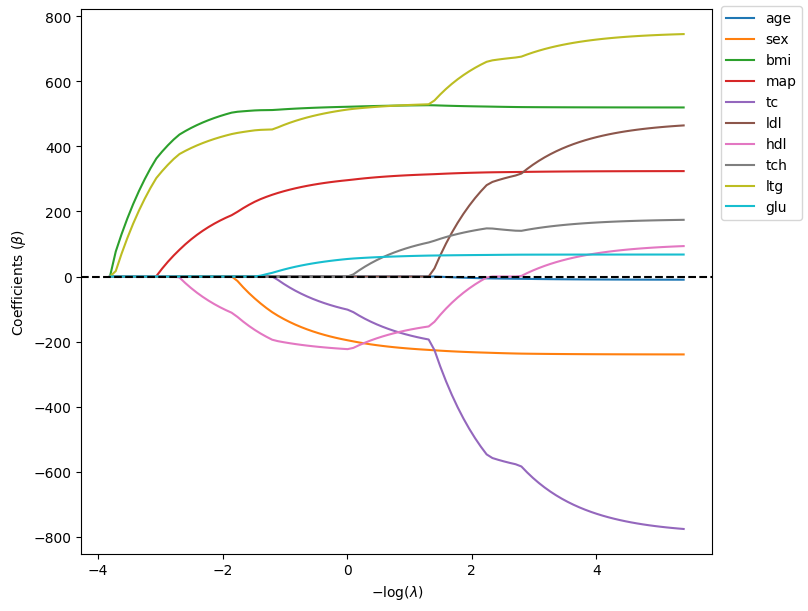

In [17]:
fig, ax = plt.subplots(figsize=(8,6), layout='constrained')
G.plot_coefficients(legend=True, ax=ax)

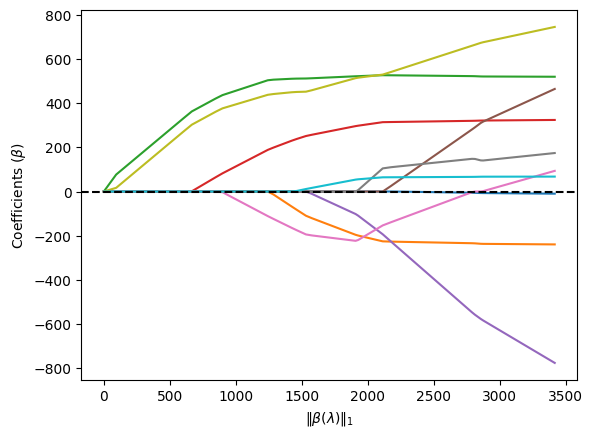

In [18]:
G.plot_coefficients(xvar='norm');

<Axes: xlabel='$-\\log(\\lambda)$'>

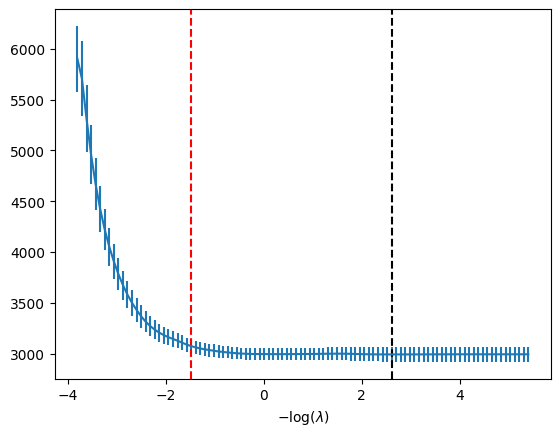

In [19]:
G.plot_cross_validation_path()

<Axes: xlabel='$\\|\\beta(\\lambda)\\|_1$'>

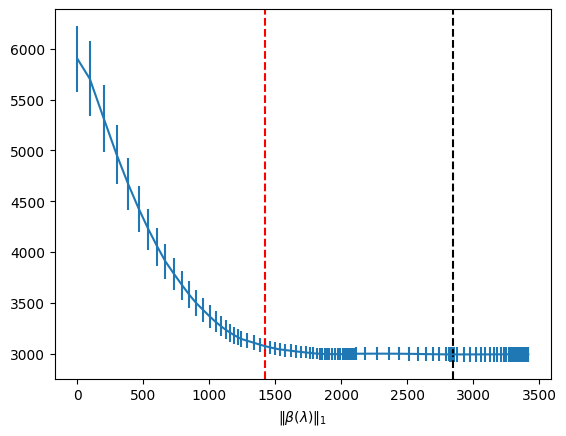

In [20]:
G.plot_cross_validation_path(xvar='norm')

<Axes: xlabel='$-\\log(\\lambda)$'>

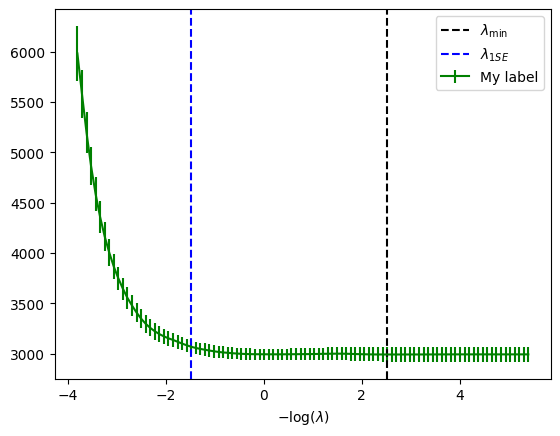

In [21]:
G2 = clone(G)
G2.fit(X, Y)
G2.cross_validation_path(X, Y, lambda_path='relative')
G2.plot_cross_validation_path(c='green', label='My label', legend=True, col_1se='blue')